In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the libraries and Iris flower classification dataset
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
import pandas as pd

In [6]:
# Convert to a DataFrame for better readability
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_df.shape

(150, 4)

In [11]:
# Adding column "Species" to the DataFrame
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
#
X = iris.data
Y = iris.target
print (f"features shape: {X.shape}")
print (f"target shape: {Y.shape}")

features shape: (150, 4)
target shape: (150,)


In [13]:
# print feature names
print (f"feature names: {iris.feature_names}")
# print target names 
print (f"target names: {iris.target_names}")
# print the description of the dataset
print ("dataset description: ", iris.DESCR)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
dataset description:  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    peta

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)    

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature engineering/selection (if needed)
# Select the top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, Y)

print("Original shape:", X.shape)
print("Transformed shape:", X_new.shape)

Original shape: (150, 4)
Transformed shape: (150, 2)


In [16]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)


0.9666666666666667

In [17]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


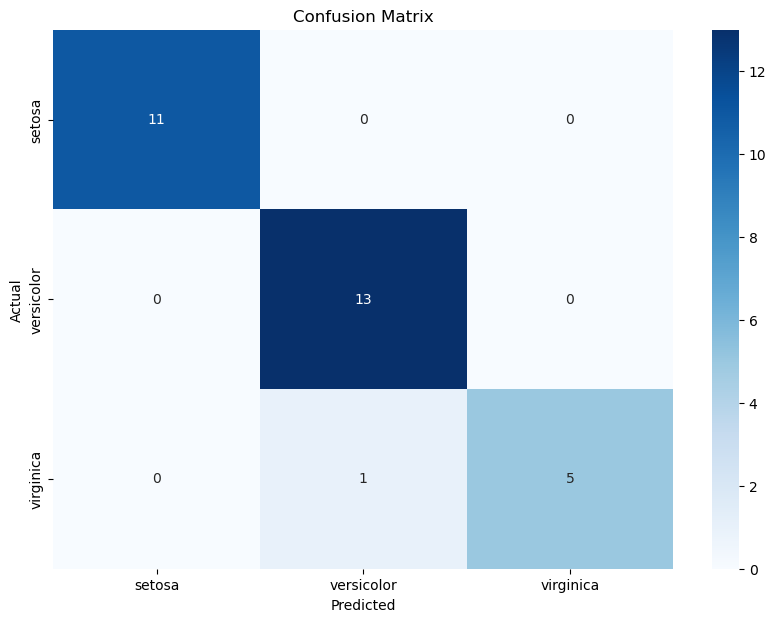

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12996\3156477610.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


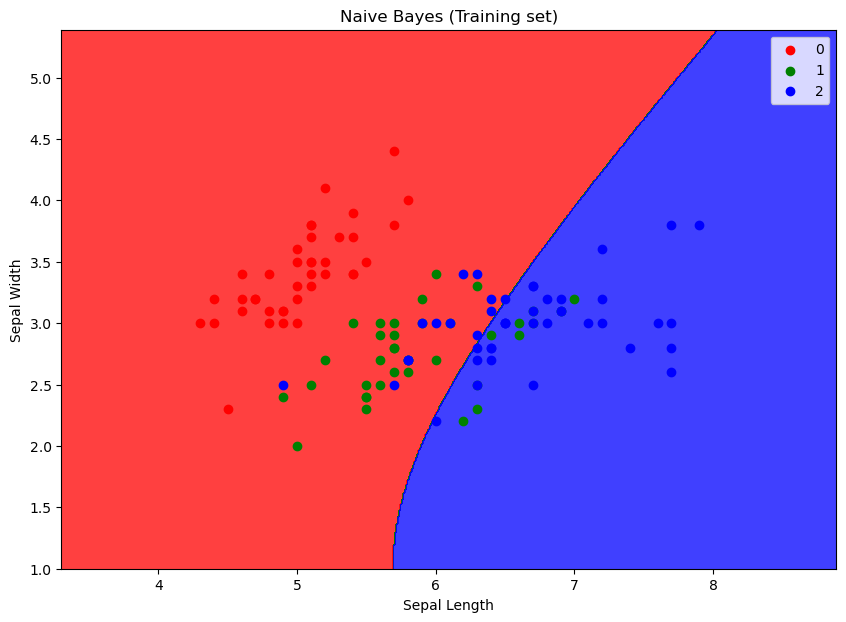

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
import numpy as np

X_set, Y_set = X_train[:, [0, 1]], Y_train
plt.figure(figsize=(10, 7))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.c_[X1.ravel(), X2.ravel(), np.zeros(X1.ravel().shape), np.zeros(X1.ravel().shape)]).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12996\412143982.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


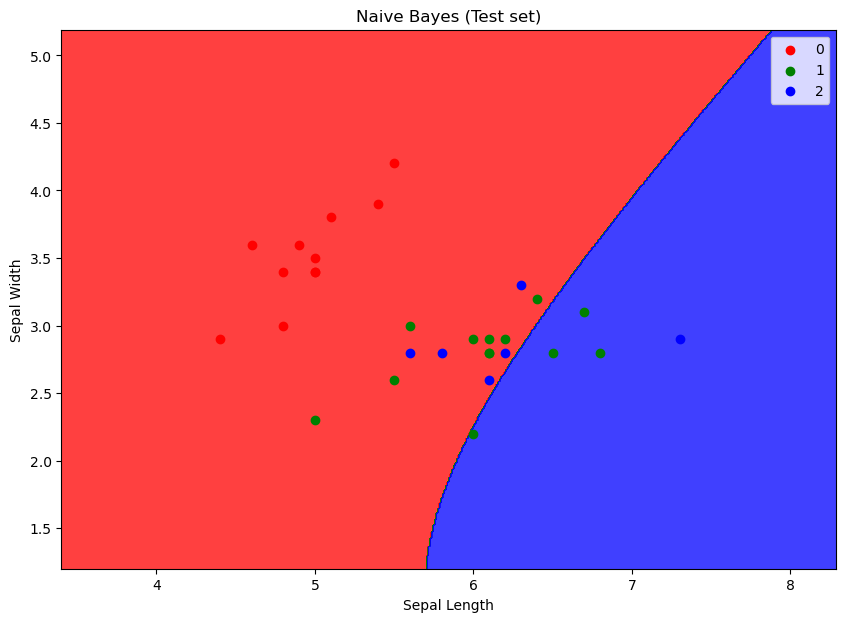

In [20]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
import numpy as np

X_set, Y_set = X_test[:, [0, 1]], Y_test
plt.figure(figsize=(10, 7))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.c_[X1.ravel(), X2.ravel(), np.zeros(X1.ravel().shape), np.zeros(X1.ravel().shape)]).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


In [21]:
# hyperparameter tuning to ensure accuracy of the model
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

# define the model
model = GaussianNB()

# define the grid of values to search
grid = dict()
grid['var_smoothing'] = [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(accuracy_score))

In [22]:
# Picking the best model for prediction 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define the models to compare
models = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'RandomForest': RandomForestClassifier()
}

# Define the grid of parameters to search for each model
param_grids = {
    'GaussianNB': {'var_smoothing': [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]},
    'LogisticRegression': {'C': [0.1, 1, 10, 100]},
    'RandomForest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
}

# Perform grid search for each model
best_estimators = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], n_jobs=-1, cv=cv, scoring=make_scorer(accuracy_score))
    grid_search.fit(X_train, Y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_model_name = max(best_estimators, key=lambda name: best_estimators[name].score(X_test, Y_test))
best_model = best_estimators[best_model_name]
test_accuracy = best_model.score(X_test, Y_test)
print(f"Best model: {best_model_name} with test accuracy: {test_accuracy:.4f}")

Best parameters for GaussianNB: {'var_smoothing': 1e-09}
Best cross-validation accuracy for GaussianNB: 0.9500
Best parameters for LogisticRegression: {'C': 100}
Best cross-validation accuracy for LogisticRegression: 0.9722
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 10}
Best cross-validation accuracy for RandomForest: 0.9444
Best model: LogisticRegression with test accuracy: 1.0000


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the RandomForestClassifier on the training set
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, Y_train)

# Predict the test set results
Y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"RandomForestClassifier accuracy: {accuracy_rf:.4f}")

RandomForestClassifier accuracy: 1.0000


In [24]:
# Predcition test 1 
# Predicting the class of a single iris flower
# Sepal Length = 5.1 cm
# Sepal Width = 3.5 cm
# Petal Length = 1.4 cm
# Petal Width = 0.2 cm
# The actual class of this flower is Iris-setosa
# We will predict the class of this flower using the trained model
X_new = [[5.1, 3.5, 1.4, 0.2]]
Y_new = classifier.predict(X_new)
print(f"Predicted class: {iris.target_names[Y_new][0]}")


Predicted class: setosa


In [25]:
# Predcition test 2
# Predicting the class of a single iris flower
# Sepal Length = 6.1 cm
# Sepal Width = 3.0 cm
# Petal Length = 4.6 cm
# Petal Width = 1.4 cm
# The actual class of this flower is Iris-versicolor
# We will predict the class of this flower using the trained model
X_new = [[6.1, 3.0, 4.6, 1.4]]
Y_new = classifier.predict(X_new)
print(f"Predicted class: {iris.target_names[Y_new][0]}")

Predicted class: versicolor


In [26]:
# Perdiction test 3 
# Predicting the class of a single iris flower
# Sepal Length = 6.8 cm
# Sepal Width = 3.2 cm
# Petal Length = 5.9 cm
# Petal Width = 2.3 cm
# The actual class of this flower is Iris-virginica
# We will predict the class of this flower using the trained model
X_new = [[6.8, 3.2, 5.9, 2.3]]
Y_new = classifier.predict(X_new)
print(f"Predicted class: {iris.target_names[Y_new][0]}")

Predicted class: virginica


In [27]:
# performance metrics
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(Y_test, Y_pred, target_names=iris.target_names))

# Print the classification report for the RandomForestClassifier
print(classification_report(Y_test, Y_pred_rf, target_names=iris.target_names))

# Print the classification report for the best model
Y_pred_best = best_model.predict(X_test)
print(classification_report(Y_test, Y_pred_best, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy        